<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/portfolio/momentum_portfolio_manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install riskfolio-lib --q

In [3]:
import riskfolio as rp
import warnings

warnings.filterwarnings("ignore")

In [29]:
import pandas as pd
import yfinance as yf

def get_nifty50_tickers():
    data = pd.read_csv('/content/ind_nifty500list.csv', sep=',')
    nifty100 = data['Symbol'].apply(lambda x: x + ".NS").tolist()
    return nifty100


def fetch_stock_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

In [37]:
nifty50_tickers = get_nifty50_tickers()

start_date = '2022-11-01'
end_date = '2024-03-01'

In [38]:
import numpy as np

rolling_periods = [21, 63, 126, 262]

# Pre-calculate minimum data length
min_data_length = max(rolling_periods)

# Pre-allocate top_decile_stocks
top_decile_stocks = [None] * len(nifty50_tickers)

for i, symbol in enumerate(nifty50_tickers):
    try:
        stock_data = fetch_stock_data(symbol, start_date, end_date)
        if len(stock_data) >= min_data_length:
            closes = stock_data['Close']
            returns = np.stack([
                closes.rolling(period).apply(lambda x: x[-1] / x[0] - 1)
                for period in rolling_periods
            ], axis=1)

            top_decile_stocks[i] = {
                'Symbol': symbol,
                'Close': closes.iloc[-1],
                'returns_21': returns[-1, 0],
                'returns_63': returns[-1, 1],
                'returns_126': returns[-1, 2],
                'returns_252': returns[-1, 3],
            }
    except:
        pass

# Filter out None values
top_decile_stocks = [stock for stock in top_decile_stocks if stock is not None]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [40]:
top_decile_stocks[0:10]

[{'Symbol': '360ONE.NS',
  'Close': 718.9500122070312,
  'returns_21': 0.16429151774418016,
  'returns_63': 0.25635650888078865,
  'returns_126': 0.4219738993828943,
  'returns_252': 0.5630197351315092},
 {'Symbol': '3MINDIA.NS',
  'Close': 31977.650390625,
  'returns_21': -0.05402346441199257,
  'returns_63': 0.0302808055248156,
  'returns_126': 0.04945224840635731,
  'returns_252': 0.39640085063948916},
 {'Symbol': 'ABB.NS',
  'Close': 5444.9501953125,
  'returns_21': 0.1977321915167165,
  'returns_63': 0.23195886539114197,
  'returns_126': 0.2769283249953023,
  'returns_252': 0.8008765322680669},
 {'Symbol': 'ACC.NS',
  'Close': 2629.300048828125,
  'returns_21': 0.03924903115736167,
  'returns_63': 0.40188210411711256,
  'returns_126': 0.32441760424537214,
  'returns_252': 0.31857274614211795},
 {'Symbol': 'AIAENG.NS',
  'Close': 3645.5,
  'returns_21': -0.1631851800293368,
  'returns_63': 0.014993136614208868,
  'returns_126': -0.00447852283817296,
  'returns_252': 0.3064201343116

In [41]:

# Create the DataFrame
df = pd.DataFrame(top_decile_stocks)

# Calculate composite scores
df['Composite Score'] = df[['returns_21', 'returns_63', 'returns_126', 'returns_252']].mean(axis=1)

# Sort by composite score (descending) and assign ranks
df['Rank'] = df['Composite Score'].rank(ascending=False,method='dense')

# Display the results
df[['Symbol', 'Composite Score', 'Rank']].head(10)

,Symbol,Composite Score,Rank
0,360ONE.NS,0.351410,154.0
1,3MINDIA.NS,0.105528,316.0
2,ABB.NS,0.376874,136.0
3,ACC.NS,0.271030,201.0
4,AIAENG.NS,0.038437,371.0
5,APLAPOLLO.NS,0.048278,358.0
6,AUBANK.NS,-0.171138,485.0
7,AARTIDRUGS.NS,0.041136,366.0
8,AARTIIND.NS,0.214359,226.0
9,AAVAS.NS,-0.092386,460.0


In [42]:
# Sort by Composite Score in descending order
df = df.sort_values(by=['Composite Score'], ascending=False)

# Assign ranks based on sorted order
#df['Rank'] = np.arange(len(df)) + 1

# Display the results (top 10 only)
print(df[['Symbol', 'Composite Score', 'Rank']].head(10))

            Symbol  Composite Score  Rank
230        IRFC.NS         1.687739   1.0
208       HUDCO.NS         1.496065   2.0
298        MRPL.NS         1.429582   3.0
315        NBCC.NS         1.330889   4.0
49          BSE.NS         1.327060   5.0
437  TATAINVEST.NS         1.320832   6.0
423      SUZLON.NS         1.257656   7.0
332     OLECTRA.NS         1.173090   8.0
244        JBMA.NS         1.160219   9.0
218       IRCON.NS         1.129424  10.0


In [51]:
assets=df['Symbol'].head(10).tolist()
Uc_assets = [x.upper() for x in assets]


In [44]:
assets_dataframe=yf.download(assets,start=start_date,end=end_date)['Close']
Y= assets_dataframe[Uc_assets].pct_change().dropna()

[*********************100%%**********************]  10 of 10 completed


In [45]:
# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'UCI' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0.0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)



In [46]:
display(w.T*100)

,IRFC.NS,HUDCO.NS,MRPL.NS,NBCC.NS,BSE.NS,TATAINVEST.NS,SUZLON.NS,OLECTRA.NS,JBMA.NS,IRCON.NS
weights,5.04487,5.923340e-07,5.412861,6.744592e-09,14.426713,15.823667,8.925408,1.3669,48.99958,3.092585e-07


In [47]:
display(w.T*100)

,IRFC.NS,HUDCO.NS,MRPL.NS,NBCC.NS,BSE.NS,TATAINVEST.NS,SUZLON.NS,OLECTRA.NS,JBMA.NS,IRCON.NS
weights,5.04487,5.923340e-07,5.412861,6.744592e-09,14.426713,15.823667,8.925408,1.3669,48.99958,3.092585e-07


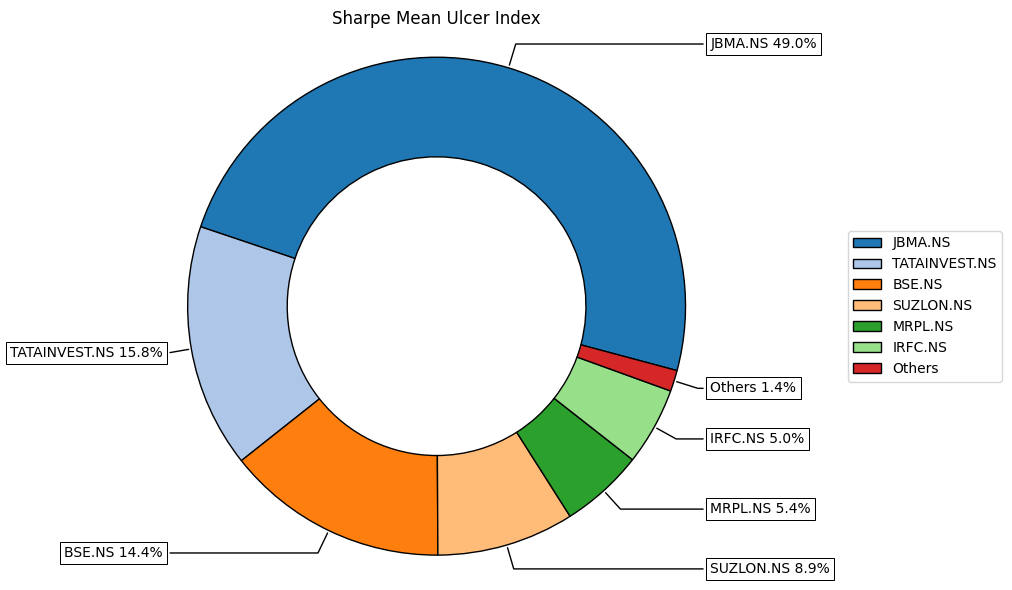

In [48]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Ulcer Index', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

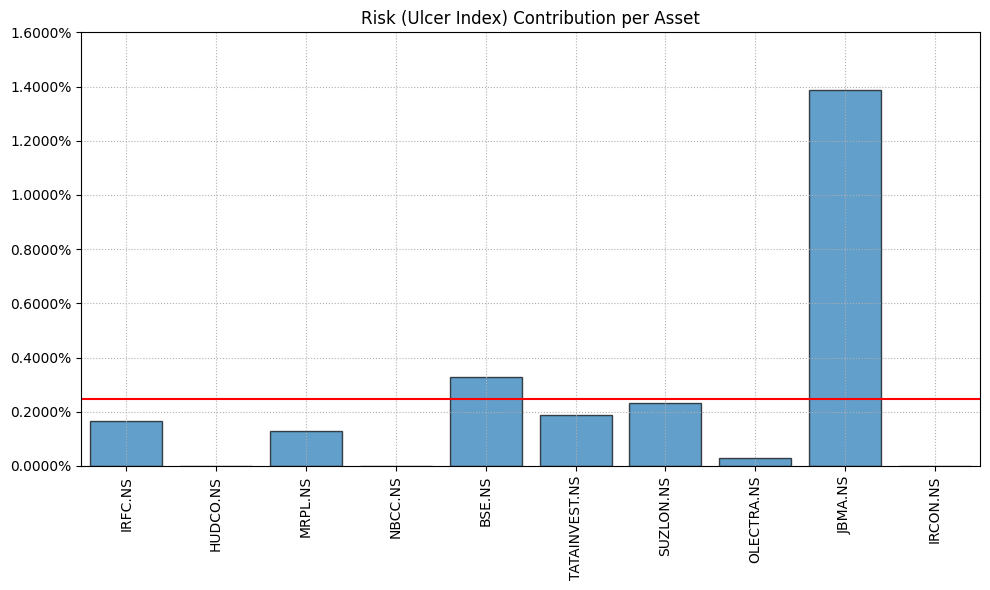

In [49]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

[*********************100%%**********************]  10 of 10 completed


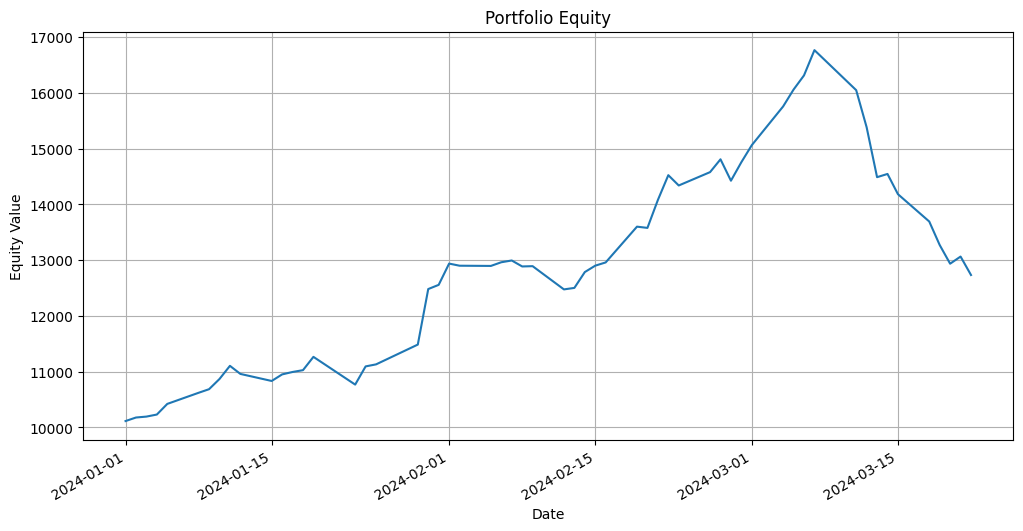

In [52]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Get today's date
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Define stock symbols and weights
symbols = assets
weights = [1,1,1,1,1,1,1,1,1,1]
# Download historical price data
data = yf.download(symbols, start="2024-01-01")["Adj Close"]

# Calculate portfolio return by multiplying weights with daily returns
portfolio_return = (data * weights).sum(axis=1)

# Plot the portfolio return
plt.figure(figsize=(12, 6))
portfolio_return.plot(title="Portfolio Equity")
plt.ylabel("Equity Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()

February 2024

|index|OFSS\.NS|PFC\.NS|HINDPETRO\.NS|PNB\.NS|DLF\.NS|GICRE\.NS|IOC\.NS|ADANIPORTS\.NS|NHPC\.NS|BAJAJ-AUTO\.NS|
|---|---|---|---|---|---|---|---|---|---|---|
|weights|11\.369589812358923|20\.052978999269733|13\.140136075115278|11\.754298083341052|0\.0004881335353018651|13\.209756686041954|8\.634034436208067|9\.234507501854768|8\.991530442658123|3\.6126798296168015|


January 2024

|index|PFC\.NS|OFSS\.NS|NHPC\.NS|GICRE\.NS|AUROPHARMA\.NS|BAJAJ-AUTO\.NS|NMDC\.NS|PNB\.NS|DLF\.NS|HINDPETRO\.NS|
|---|---|---|---|---|---|---|---|---|---|---|
|weights|19\.9359517241607|11\.644344545584069|8\.119085100588297|12\.482069877947783|7\.860525413315095|2\.992422884219905|9\.734022841420229|12\.332839597407245|1\.374861273536692|13\.523876741819981|
